In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
fname = 'features.csv'
features = pd.read_csv(fname, index_col=False)

Ia_labels = [item if item == 'Ia' else 'non_Ia' for item in features['type'].values]
features['Ia_labels'] = Ia_labels
features

,id,type,a_g,b_g,c_g,snratio_g,chisq_g,nrise_g,a_r,b_r,c_r,snratio_r,chisq_r,nrise_r,Ia_labels
0,1301429164015010019,EB*,-1105.789985,1103.853587,1.392543e+03,7.050043,0.006660,4.0,0.067122,16.610245,6210.249774,9.382338,0.014487,5.0,non_Ia
1,1410147305615015006,EB*,0.420187,2.439733,8.549407e+03,14.523205,0.056589,6.0,2.083686,-1.547589,9015.223746,15.704742,0.003519,5.0,non_Ia
2,1428112765015015007,Star,0.343910,-3.565492,1.317004e+04,20.200311,0.000175,7.0,0.231766,-4.941955,156635.548796,34.650492,0.000482,9.0,non_Ia
3,1423123134615015018,RotV*,0.451423,-0.221475,2.059407e+04,13.259855,0.005113,6.0,0.350698,-1.984406,21398.544312,7.377085,0.005067,5.0,non_Ia
4,1423097611515010016,C*,0.260247,-3.184548,7.227037e+03,12.504652,0.006098,9.0,0.040800,3.159938,100753.782198,16.398048,0.008212,4.0,non_Ia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23835,1291360770515010018,RRLyr,0.122026,-4.712581,1.414059e+04,17.017889,0.000064,5.0,0.115555,-3.109569,10480.046752,16.615427,0.003676,5.0,non_Ia
23836,1298279460815010000,QSO,1.899125,-1.130203,1.043311e+03,6.999284,0.001716,8.0,0.280100,-9.391835,1162.377810,7.956925,0.000488,5.0,non_Ia
23837,1288244595715015014,RRLyr,0.019917,249.130376,5.644027e+06,20.263146,0.000196,4.0,2.811020,-11.522814,43667.162547,25.815541,0.006310,4.0,non_Ia
23838,1296296814415010000,LPV*,0.097144,-7.615365,1.845052e+03,6.767350,0.002641,6.0,0.085687,4.319699,33815.803986,11.700681,0.009200,8.0,non_Ia


In [3]:
features2 = features.sample(n=5000, replace=False)

flag1 = np.logical_and(features2['a_g'] > -1, features2['a_g']< 5)
flag2 = np.logical_and(features2['b_g'] >-75, features2['b_g'] < 200)
flag3 = np.logical_and(features2['c_g']<10**5, flag2)
flag4 = np.logical_and(features2['chisq_g']<10**5, flag3)
flag = np.logical_and(flag1, flag4)

type_flag = features2[flag]['Ia_labels'].values == 'Ia'

flag1x = np.logical_and(features2['a_r'] > -1, features2['a_r']< 5)
flag2x = np.logical_and(features2['b_r'] >-75, features2['b_r'] < 200)
flag3x = np.logical_and(features2['c_r']<10**5, flag2x)
flag4x = np.logical_and(features2['chisq_r']<10**5, flag3x)
flag5x = np.logical_and(flag1x, flag4x)
flagx = np.logical_and(flag5x, flag)

type_flagx = features2[flagx]['Ia_labels'].values == 'Ia'

In [4]:
# Get features from TDEs
fname_tdes = 'features_tdes.csv'
features_tdes = pd.read_csv(fname_tdes, index_col=False)
features_tdes

,id,type,a_g,b_g,c_g,snratio_g,mse_g,nrise_g,a_r,b_r,c_r,snratio_r,mse_r,nrise_r,chisq_g,chisq_r
0,ZTF17aaazdba,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,1.000000e+08,1.000000e+08
1,ZTF18aabtxvd,TDE,0.000526,-1456.973146,1.399162e+03,6.586493,2.442064e-06,30,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,2.166526e-03,1.000000e+08
2,ZTF18aahqkbt,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.001166,7831.139070,9.485285e+06,6.823661,8.396795e-04,8,1.000000e+08,5.509836e-02
3,ZTF18aakelin,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,1.000000e+08,1.000000e+08
4,ZTF18acaqdaa,TDE,0.000996,2640.714873,1.248970e+04,6.158522,2.312753e-05,4,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,3.650504e-04,1.000000e+08
5,ZTF18acpdvos,TDE,0.000088,18757.388536,1.579833e+05,32.501600,4.767827e-07,13,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,7.988552e-05,1.000000e+08
6,ZTF19abzrhgq,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,1.000000e+08,1.000000e+08
7,ZTF19accmaxo,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,1.000000e+08,1.000000e+08
8,ZTF19acspeuw,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,1.000000e+08,1.000000e+08
9,ZTF20aabqihu,TDE,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,0.000000,0.000000,0.000000e+00,0.100000,1.000000e+08,0,1.000000e+08,1.000000e+08


In [5]:
# Flags TDEs

flagr_tde = np.logical_and.reduce((features_tdes['a_r'] > -1, features_tdes['a_r']< 5, 
                                   features_tdes['b_r'] >-75, features_tdes['b_r'] < 200,
                                   features_tdes['c_r']<10**5, features_tdes['mse_r']<10**5))
flagg_tde = np.logical_and.reduce((features_tdes['a_g'] > -1, features_tdes['a_g']< 5, 
                                   features_tdes['b_g'] >-75, features_tdes['b_g'] < 200,
                                   features_tdes['c_g']<10**5, features_tdes['mse_g']<10**5))

flag_tde = np.logical_and(flagg_tde, flagr_tde)


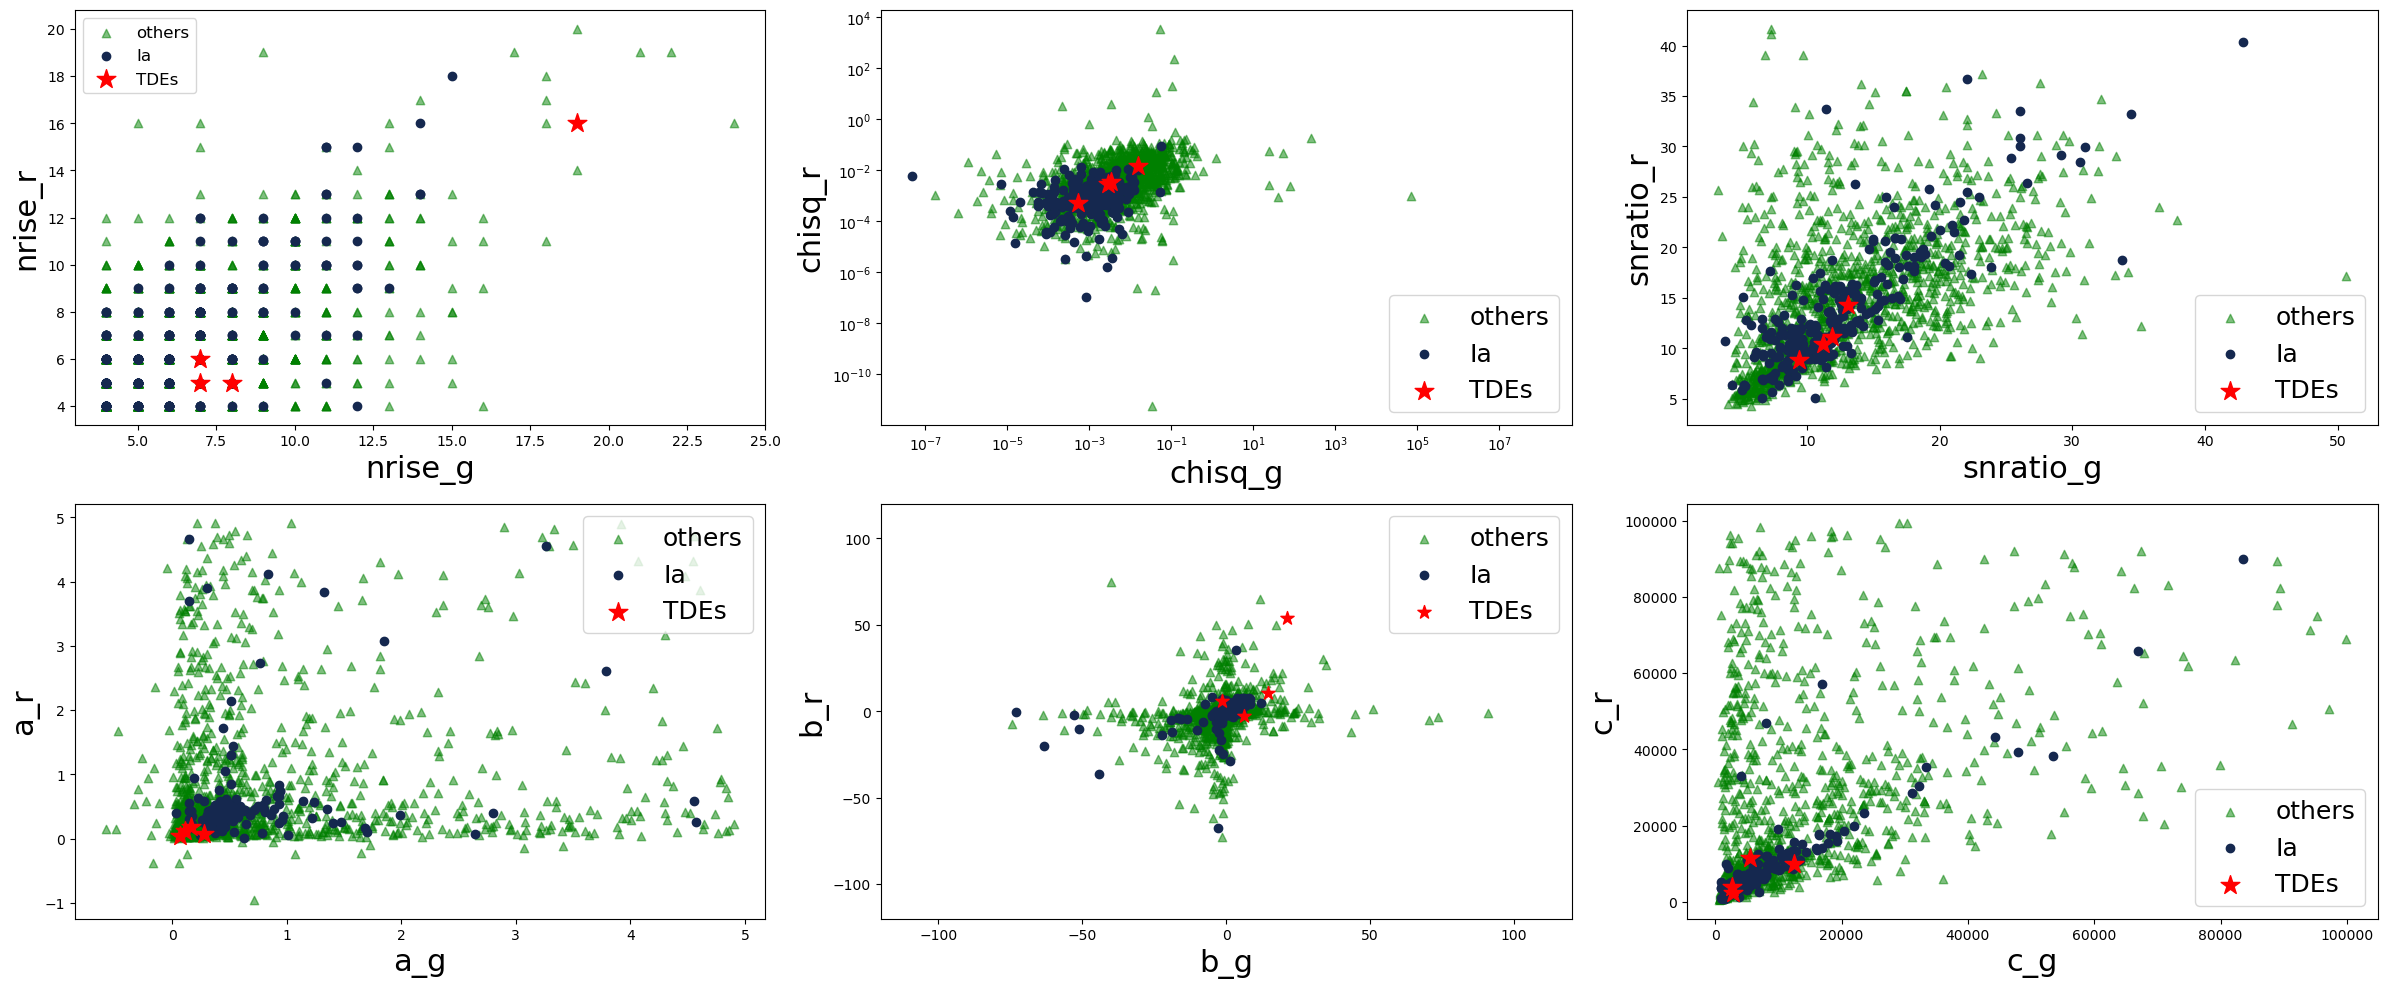

In [6]:
#c = ['#15284F', '#F5622E']


p11x = 'nrise_g'
p11y = 'nrise_r'

p12x = 'chisq_g'
p12y = 'chisq_r'

p13x = 'snratio_g'
p13y = 'snratio_r'

p21x = 'a_g'
p21y = 'a_r'

p22x = 'b_g'
p22y = 'b_r'

p23x = 'c_g'
p23y = 'c_r'

# fontsize, legend size, marker size
fs = 22
ls = 18
ms = 250
m_tdes = '*'
mc_tdes = 'red'

c = ['#15284F', 'green']


fig, axes = plt.subplots(2,3,figsize=(24,10))
axes = [ax for ax in axes.flat]
axes[0].scatter(features2[flagx][~type_flagx][p11x], features2[flagx][~type_flagx][p11y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
axes[0].scatter(features2[flagx][type_flagx][p11x], features2[flagx][type_flagx][p11y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')

axes[0].scatter(features_tdes[flag_tde][p11x], features_tdes[flag_tde][p11y], 
            color=mc_tdes, alpha=1, label='TDEs',
           marker=m_tdes, s =ms)
axes[0].set_xlabel(p11x, fontsize=fs)
axes[0].set_ylabel(p11y, fontsize=fs)
axes[0].legend(fontsize=12, loc='upper left')
#plt.xscale('log')

# plt.subplot(2,3,2)
axes[1].scatter(features2[flagx][~type_flagx][p12x], features2[flagx][~type_flagx][p12y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
axes[1].scatter(features2[flagx][type_flagx][p12x], features2[flagx][type_flagx][p12y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
axes[1].scatter(features_tdes[flag_tde][p12x], features_tdes[flag_tde][p12x], 
            color=mc_tdes, alpha=1, label='TDEs',
           marker=m_tdes, s =ms)
axes[1].scatter([1e8], [1e-7], color='white')
axes[1].set_xlabel(p12x, fontsize=fs)
axes[1].set_ylabel(p12y, fontsize=fs)
axes[1].legend(fontsize=ls, loc='lower right')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

#plt.subplot(2,3,3)
axes[2].scatter(features2[flagx][~type_flagx][p13x], features2[flagx][~type_flagx][p13y],
            color=c[1], alpha=0.5, label='others', 
            marker='^')
axes[2].scatter(features2[flagx][type_flagx][p13x], features2[flagx][type_flagx][p13y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
axes[2].scatter(features_tdes[flag_tde][p13x], features_tdes[flag_tde][p13y], 
            color=mc_tdes, alpha=1, label='TDEs',
           marker=m_tdes, s =ms)
axes[2].set_xlabel(p13x, fontsize=fs)
axes[2].set_ylabel(p13y, fontsize=fs)
axes[2].legend(fontsize=ls)
#plt.yscale('log')

#plt.subplot(2,3,4)
axes[3].scatter(features2[flagx][~type_flagx][p21x], features2[flagx][~type_flagx][p21y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
axes[3].scatter(features2[flagx][type_flagx][p21x], features2[flagx][type_flagx][p21y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
axes[3].scatter(features_tdes[flag_tde][p21x], features_tdes[flag_tde][p21y], 
            color=mc_tdes, alpha=1, label='TDEs',
           marker=m_tdes, s =ms)
axes[3].set_xlabel(p21x, fontsize=fs)
axes[3].set_ylabel(p21y, fontsize=fs)
axes[3].legend(fontsize=ls)
#plt.xscale('log')
#plt.yscale('log')

# plt.subplot(2,3,5)
axes[4].scatter(features2[flagx][~type_flagx][p22x], features2[flagx][~type_flagx][p22y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
axes[4].scatter(features2[flagx][type_flagx][p22x], features2[flagx][type_flagx][p22y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
axes[4].scatter(features_tdes[flag_tde][p22x], features_tdes[flag_tde][p22y], 
            color=mc_tdes, alpha=1, label='TDEs',
           marker=m_tdes, s =100)
axes[4].set_xlabel(p22x, fontsize=fs)
axes[4].set_ylabel(p22y, fontsize=fs)
axes[4].legend(fontsize=ls)
axes[4].set_xlim(-120, 120)
axes[4].set_ylim(-120, 120)

#plt.subplot(2,3,6)
axes[5].scatter(features2[flagx][~type_flagx][p23x], features2[flagx][~type_flagx][p23y], 
            color=c[1], alpha=0.5, label='others', 
            marker='^')
axes[5].scatter(features2[flagx][type_flagx][p23x], features2[flagx][type_flagx][p23y], 
            color=c[0], alpha=1, label='Ia',
           marker='o')
axes[5].scatter(features_tdes[flag_tde][p23x], features_tdes[flag_tde][p23y], 
            color=mc_tdes, alpha=1, label='TDEs',
           marker=m_tdes, s =ms)
axes[5].set_xlabel(p23x, fontsize=fs)
axes[5].set_ylabel(p23y, fontsize=fs)
axes[5].legend(fontsize=ls)


plt.tight_layout()

plt.savefig('features_plot_with_tdes.png')

In [ ]:
plt.show()

In [27]:
len(features_tdes[(features_tdes.nrise_g !=0) & (features_tdes.nrise_r !=0)])

7